<a href="https://colab.research.google.com/github/sanikakarande/Machine-Learning/blob/main/Doctor_Visits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_csv('/content/DoctorVisits - DA.csv')

In [5]:
df.head(10)

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no
5,6,1,female,0.19,0.35,5,1,9,no,no,no,yes,no
6,7,1,female,0.19,0.55,4,0,2,no,no,no,no,no
7,8,1,female,0.19,0.15,3,0,6,no,no,no,no,no
8,9,1,female,0.19,0.65,2,0,5,yes,no,no,no,no
9,10,1,male,0.19,0.15,1,0,0,yes,no,no,no,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5190 entries, 0 to 5189
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5190 non-null   int64  
 1   visits      5190 non-null   int64  
 2   gender      5190 non-null   object 
 3   age         5190 non-null   float64
 4   income      5190 non-null   float64
 5   illness     5190 non-null   int64  
 6   reduced     5190 non-null   int64  
 7   health      5190 non-null   int64  
 8   private     5190 non-null   object 
 9   freepoor    5190 non-null   object 
 10  freerepat   5190 non-null   object 
 11  nchronic    5190 non-null   object 
 12  lchronic    5190 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 527.2+ KB


In [6]:
duplicates = df.duplicated().sum()
print(f"Number of duplicates: {duplicates}")

Number of duplicates: 0


In [7]:
illness_counts = df['illness'].value_counts()
print(illness_counts)

illness
1    1638
0    1554
2     946
3     542
4     274
5     236
Name: count, dtype: int64


In [8]:
gender_illness = pd.crosstab(df['gender'], df['illness'])
print(gender_illness)

illness    0    1    2    3    4    5
gender                               
female   679  834  531  333  167  158
male     875  804  415  209  107   78


In [9]:
income_dist = df['income'].describe()
print(income_dist)

count    5190.000000
mean        0.583160
std         0.368907
min         0.000000
25%         0.250000
50%         0.550000
75%         0.900000
max         1.500000
Name: income, dtype: float64


In [10]:
reduced_activity = df.groupby('gender')['reduced'].sum()
print(reduced_activity)


gender
female    2636
male      1837
Name: reduced, dtype: int64


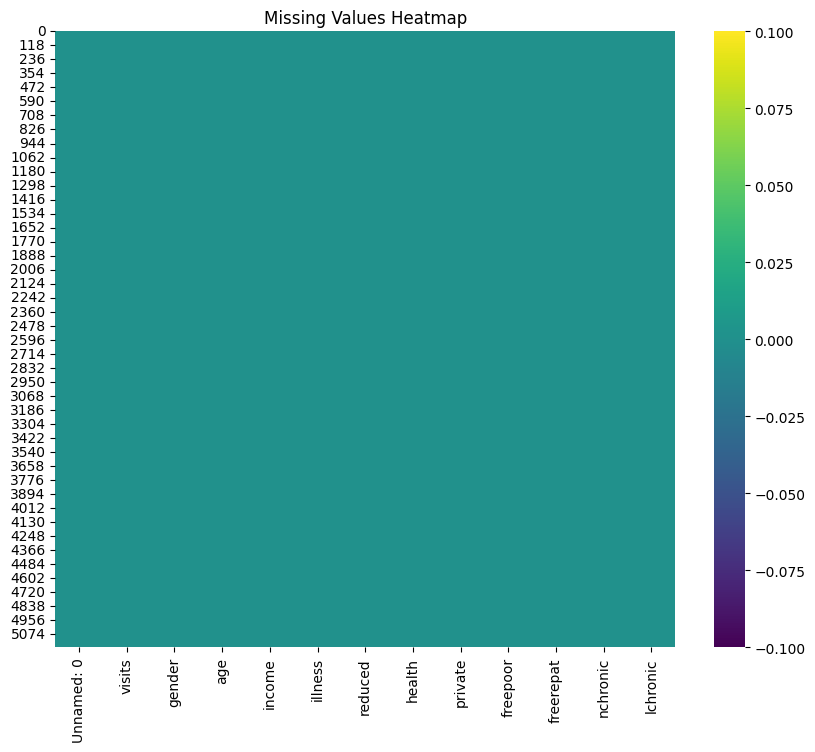

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [12]:
cat_cols = df.select_dtypes(include=['object']).columns

In [16]:
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [26]:
num_cols = df.select_dtypes(include=['int64', 'float32']).columns
corr_matrix = df[num_cols].corr()


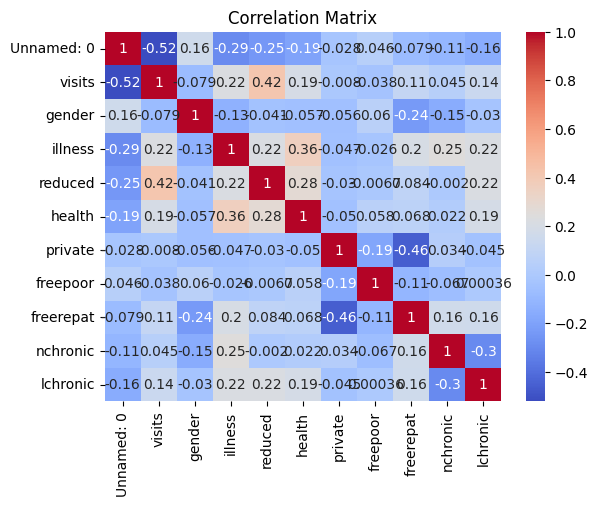

In [31]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


#  8: Analyze income vs hospital visits


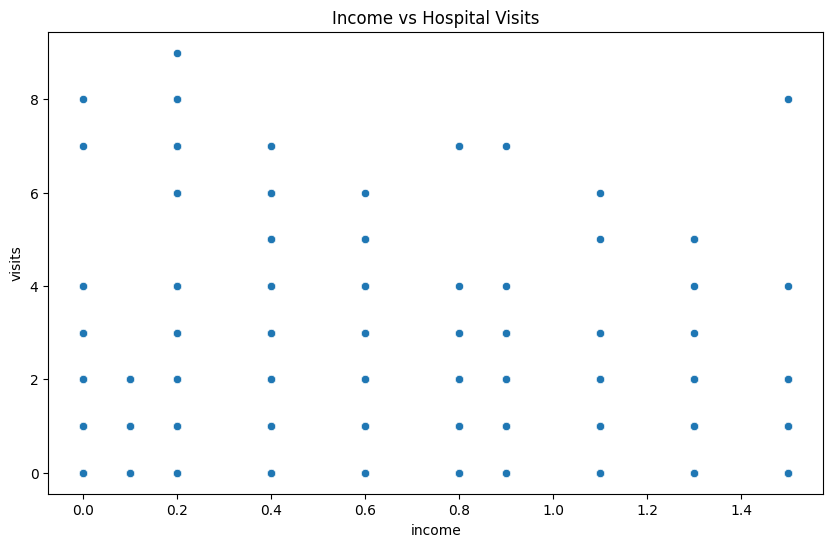

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='income', y='visits', data=df)
plt.title('Income vs Hospital Visits')
plt.show()

# **9: Count and visualize males/females affected by illness**

illness    0    1    2    3    4    5
gender                               
0        679  834  531  333  167  158
1        875  804  415  209  107   78


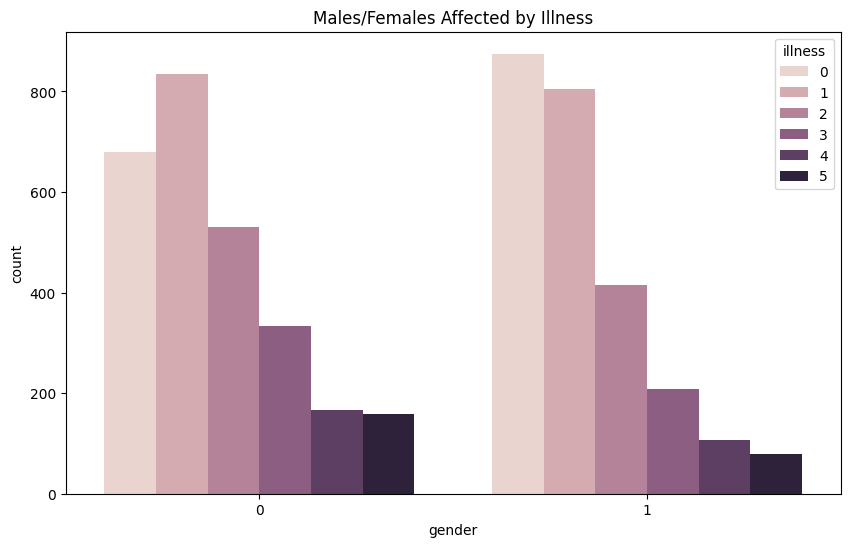

In [38]:
gender_illness = pd.crosstab(df['gender'], df['illness'])
print(gender_illness)
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='illness', data=df)
plt.title('Males/Females Affected by Illness')
plt.show()

# Point 10: Visualize health insurance distribution

In [48]:
free_healthcare = df[['freepoor', 'freerepat', 'nchronic', 'lchronic']].sum()

print("Free Healthcare Distribution:")
print(free_healthcare)


Free Healthcare Distribution:
freepoor      222
freerepat    1091
nchronic     2092
lchronic      605
dtype: int64


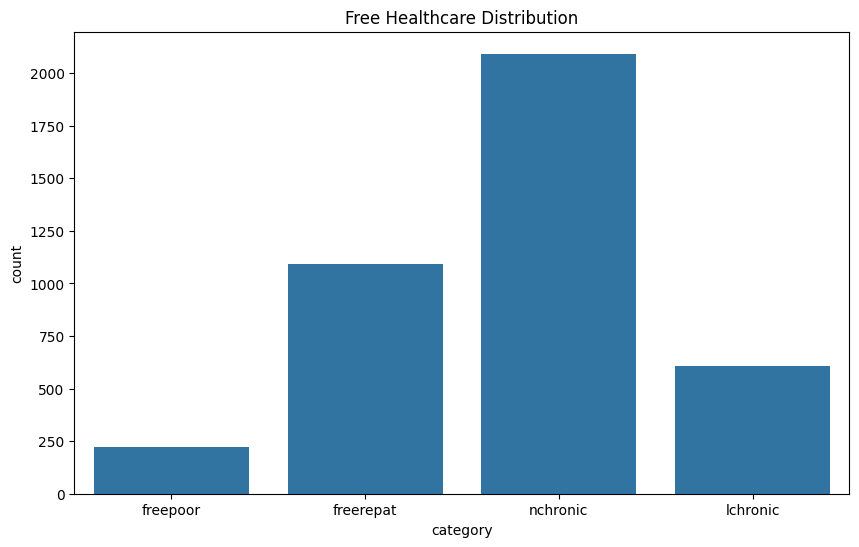

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(x=free_healthcare.index, y=free_healthcare.values)
plt.title('Free Healthcare Distribution')
plt.xlabel('category')
plt.ylabel('count')
plt.show()

In [53]:
total_count = len(df)
free_poor_percentage = (df['freepoor'].sum() / total_count) * 100
free_repat_percentage = (df['freerepat'].sum() / total_count) * 100
nchronic_percentage = (df['nchronic'].sum() / total_count) * 100
lchronic_percentage = (df['lchronic'].sum() / total_count) * 100

print(f"Free Healthcare due to Low Income: {free_poor_percentage}%")
print(f"Free Healthcare due to Old Age: {free_repat_percentage}%")
print(f"Free Healthcare due to Non-Chronic Illness: {nchronic_percentage}%")
print(f"Free Healthcare due to Long-Term Chronic Illness: {lchronic_percentage}%")


Free Healthcare due to Low Income: 4.277456647398844%
Free Healthcare due to Old Age: 21.021194605009633%
Free Healthcare due to Non-Chronic Illness: 40.30828516377649%
Free Healthcare due to Long-Term Chronic Illness: 11.657032755298651%


# **Point 11: Reduced activity days by gender**

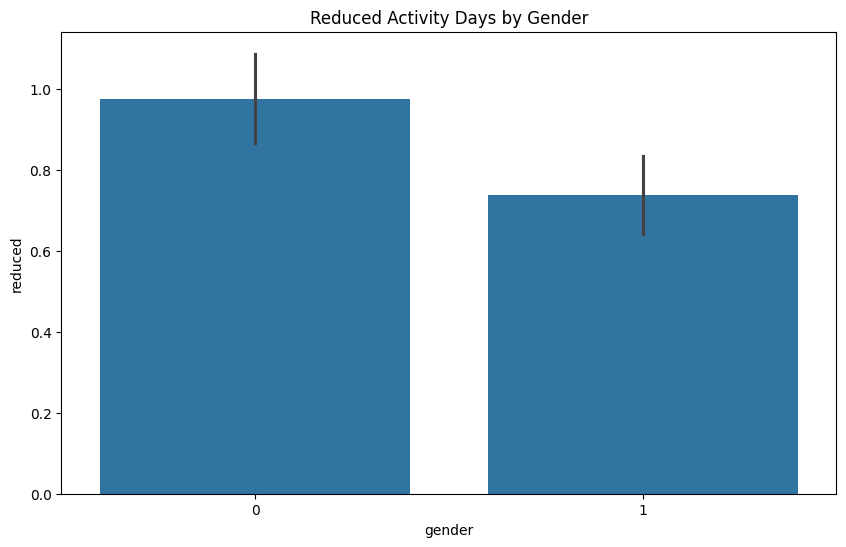

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='reduced', data=df)
plt.title('Reduced Activity Days by Gender')
plt.show()

# Point 12: Health status vs activity reduction heatmap

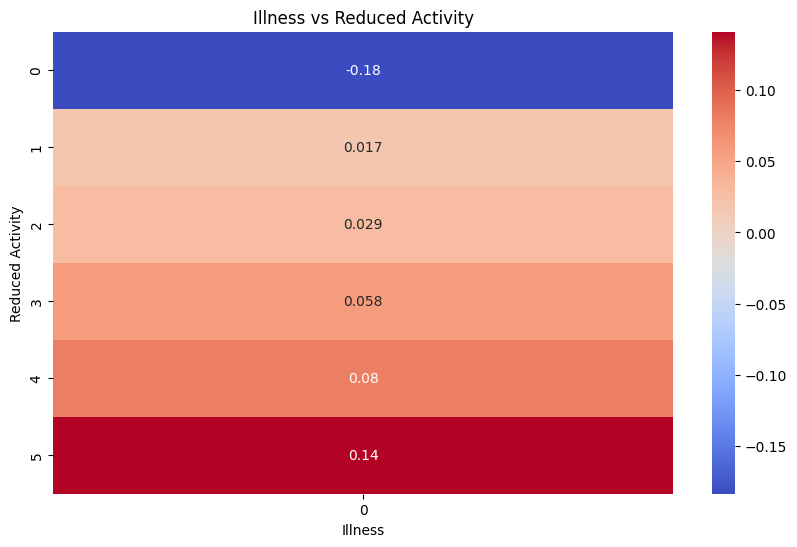

In [54]:
illness_dummies = pd.get_dummies(df['illness'])
reduced_activity = df['reduced']

# Calculate correlation matrix
corr_matrix = illness_dummies.corrwith(reduced_activity)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix.to_frame(), annot=True, cmap='coolwarm')
plt.title('Illness vs Reduced Activity')
plt.xlabel('Illness')
plt.ylabel('Reduced Activity')
plt.show()

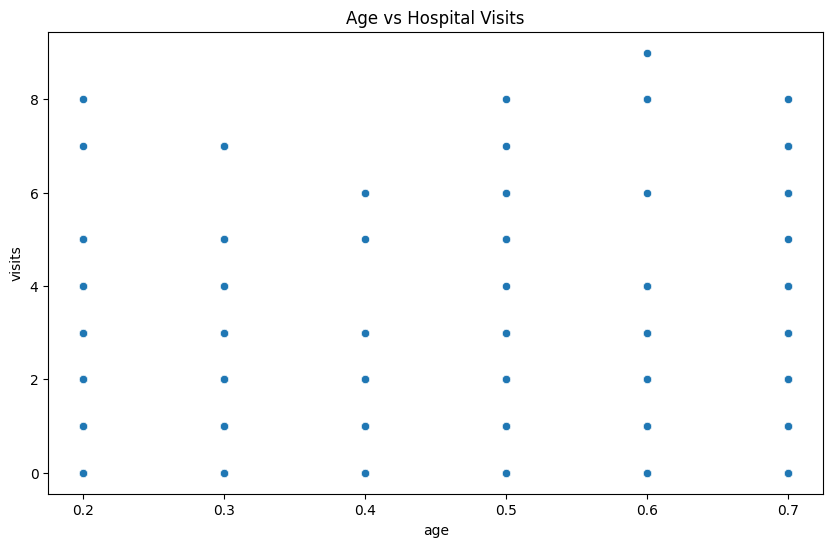

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='visits', data=df)
plt.title('Age vs Hospital Visits')
plt.show()
